# Submission details
Name: Callum Freeburn


Model: Support Vector Machine

## **Import Libraries, Set up and Validate Data**

In [52]:
#import Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature 
from sklearn import svm 
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import random
import cv2


In [53]:
# mount to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
%cd /content/gdrive/My Drive/42028/Assignment1
%mkdir data
%cd /content/gdrive/My Drive/42028/Assignment1/data

/content/gdrive/My Drive/42028/Assignment1
mkdir: cannot create directory ‘data’: File exists
/content/gdrive/My Drive/42028/Assignment1/data


In [55]:
#download the dataset
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  9089k      0  0:00:01  0:00:01 --:--:-- 9097k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0  53285      0 --:--:-- --:--:-- --:--:-- 53187
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0  1709k      0 --:--:-- --:--:-- --:--:-- 1707k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0   7495      0 --:--:-- --:--:-- --:--:--  7507


In [56]:
# load the dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [57]:
#check that dataset is there
!ls

t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [58]:
#splits the data
X_train, y_train = load_mnist('/content/gdrive/My Drive/42028/Assignment1/data', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/42028/Assignment1/data', kind='t10k')

#config labels for images
labelNames = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

In [59]:
# see current shape of X data and amount of data in each set 
print(np.shape(X_train))
print(np.shape(X_test))

#Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

(60000, 784)
(10000, 784)


In [60]:
# converts flatten vector of 784 into images of 28x28
X_train_reshaped=X_train.reshape(-1,28,28)
X_test_reshaped=X_test.reshape(-1,28,28)

In [61]:
#confirms the data has been reshaped
print(np.shape(X_train_reshaped))
print(np.shape(X_test_reshaped))

(60000, 28, 28)
(10000, 28, 28)


six
zero
five
three


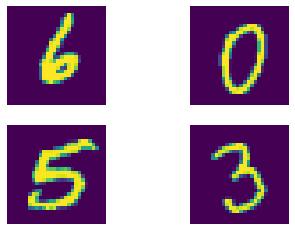

In [62]:
#show 4 random images to ensure they are correct
img_index = random.randint(0, 59999)
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_train_reshaped[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 1000
ax2.imshow(X_train_reshaped[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,3)
ax2.axis('off')
img_index = 20000
ax2.imshow(X_train_reshaped[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,4)
ax2.axis('off')
img_index = 30000
ax2.imshow(X_train_reshaped[img_index])
print(labelNames[y_train[img_index]])

## **Implementing Raw Input Feature into SVM Model**

In [63]:
#raw Pixels Model
#check if correct shape of (xxxxx, 784)
print(np.shape(X_train)) #(60000, 784)
print(np.shape(X_test)) #(10000, 784)

#config SVM model with rbf=kernal, gamma = 0.05
SVM_Model_Raw_Pixels = svm.SVC(kernel='rbf', gamma = 0.05)
#fits model to data
SVM_Model_Raw_Pixels.fit(X_train, y_train)
# calculate the training set accuracy
raw_pixel_acc_train = SVM_Model_Raw_Pixels.score(X_train,y_train)
print('Train set accuracy: ', raw_pixel_acc_train)

#get raw pixel y prediction 
raw_pixel_y_prediction = SVM_Model_Raw_Pixels.predict(X_test)

acc_test = SVM_Model_Raw_Pixels.score(X_test, y_test)
print('Test set accuracy: ', raw_pixel_acc_train)

(60000, 784)
(10000, 784)
Train set accuracy:  0.9992166666666666
Test set accuracy:  0.9992166666666666


In [64]:
#obtain accuracy of test data
raw_pixel_testing_acc = metrics.accuracy_score(y_test, raw_pixel_y_prediction)
print("Accuracy on test dataset:",raw_pixel_testing_acc)

Accuracy on test dataset: 0.9826


[[ 972    0    1    0    0    2    2    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   4    0 1014    0    1    0    0    6    7    0]
 [   0    0    2  996    0    2    0    6    4    0]
 [   0    0    3    0  965    0    4    0    2    8]
 [   2    0    0    6    1  877    2    1    2    1]
 [   4    2    0    0    2    3  946    0    1    0]
 [   0    3   10    1    1    0    0 1003    2    8]
 [   2    0    1    4    0    3    0    3  958    3]
 [   3    3    2    7   10    2    1    6    6  969]]


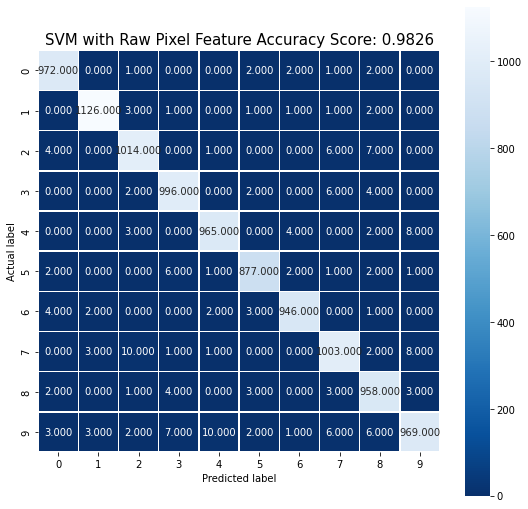

In [65]:
#config confussion matrix
cm  = metrics.confusion_matrix(y_test, raw_pixel_y_prediction)
print(cm)

# Visulise Confussion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM with Raw Pixel Feature Accuracy Score: {0}'.format(raw_pixel_testing_acc)
plt.title(all_sample_title, size = 15);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


one


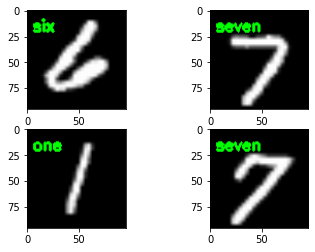

In [66]:
#visualize 10 random predictions.
images = []
orig_labels=[]
# randomly select a few testing digit items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the digit
  test_img = (X_test_reshaped[i])
  prediction = SVM_Model_Raw_Pixels.predict(test_img.reshape(1, -1))
  label = labelNames[prediction[0]]
  orig_label=labelNames[y_test[i]]
  image = X_test_reshaped[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

## Display the classification results
#Plot the image and the predicted labels
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])

## **Implementing LBP Feature into SVM Model**

In [67]:
#Implementing LBP Feature Extraction Class
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
		# return the histogram of Local Binary Patterns
		return hist

In [68]:
#Config LBP Class
desc = LocalBinaryPatterns(24, 8)
LBP_training_data = []
LBP_training_labels = []

# extracts the LBP feature from the training data and is added to a new data set
for img_index in range(len(X_train_reshaped)):
	image = (X_train_reshaped[img_index])
	hist = desc.LBPfeatures(image)
	LBP_training_labels.append(y_train[img_index])
	LBP_training_data.append(hist)

In [69]:
#config SVM model with kernal='rbf', gamma = 0.05
SVM_Model_LBP = svm.SVC(kernel='rbf', gamma = 0.05)
#fits model to the training data
SVM_Model_LBP.fit(LBP_training_data, LBP_training_labels)
# calculate the training set accuracy
LBP_training_acc = SVM_Model_LBP.score(LBP_training_data, LBP_training_labels)
print("Train set Accuracy: {:.2f}".format(LBP_training_acc))

Train set Accuracy: 0.29


In [70]:
# Extract LBP Feature from test set
LBP_predictions=[]
LBP_predictions_labels=[]
for im_index in range(len(X_test_reshaped)):
  imag = X_test_reshaped[im_index]
  histo = desc.LBPfeatures(imag)
  prediction = SVM_Model_LBP.predict(histo.reshape(1, -1))
  LBP_predictions.append(prediction)
  LBP_predictions_labels.append(y_test[im_index])

In [71]:
#obtain accuracy of test data
LBP_testing_acc = metrics.accuracy_score(y_test, LBP_predictions)
print("Accuracy on test dataset:",LBP_testing_acc)

Accuracy on test dataset: 0.2873


[[ 658    0    2  215    0    0    0   57    0   48]
 [   0 1078    2    2    0    0    0   53    0    0]
 [ 151   24   71  406    0    0    0  367    2   11]
 [ 248   51   23  322    1    0    0  324    0   41]
 [  53   47   19  199    6    0    0  557    0  101]
 [ 164   57   15  230    1    0    0  380    0   45]
 [ 188   40   35  289    0    0    0  357    3   46]
 [  17  238   19  139    0    0    0  593    0   22]
 [ 254    9   32  392    1    0    0  236    5   45]
 [  95   51    3  208    0    0    0  512    0  140]]


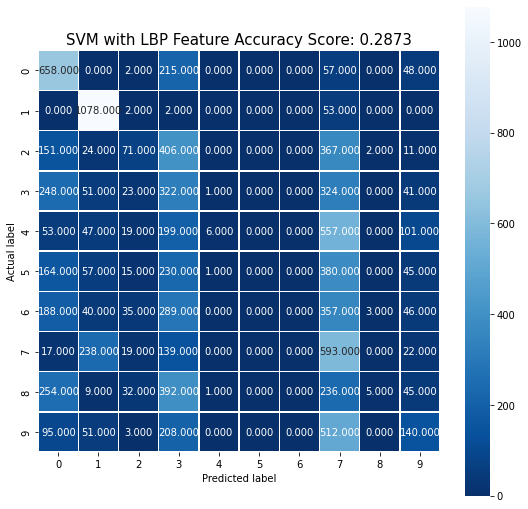

In [72]:
#config confussion matrix
cm  = metrics.confusion_matrix(y_test, LBP_predictions)
print(cm)

# Visulise Confussion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM with LBP Feature Accuracy Score: {0}'.format(LBP_testing_acc)
plt.title(all_sample_title, size = 15);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


nine


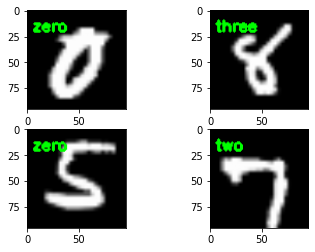

In [73]:
# Display the some classification result on test samples
images = []
 
# randomly select a few testing digit items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the digits
  histog = desc.LBPfeatures(X_test_reshaped[i])
  prediction = SVM_Model_LBP.predict(histog.reshape(1, -1))
  label = labelNames[prediction[0]]
  orig_label=labelNames[y_test[i]]
  image = X_test_reshaped[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

## Display the classification results
#Plot the image and the predicted labels
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])

## **Implementing HOG Feature into SVM Model**

In [74]:
#HOG Feature Extraction from training data
print("Extracting features from training dataset...")
HOG_training_data = []
HOG_training_labels = []

# loop over the reshaped training images
for img_index in range(len(X_train_reshaped)):
  # load the image, and extract HOG features
  image = (X_train_reshaped[img_index])
  H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
 
  # update the data and labels set
  HOG_training_data.append(H)
  HOG_training_labels.append(y_train[img_index])

Extracting features from training dataset...


In [75]:
#config SVM model with kernal='rbf', gamma = 0.05
SVM_Model_HOG = svm.SVC(kernel='rbf', gamma = 0.05)
#fits model to data
SVM_Model_HOG.fit(HOG_training_data, HOG_training_labels)
# calculate the training set accuracy
HOG_training_acc = SVM_Model_HOG.score(HOG_training_data, HOG_training_labels)
print("Train set Accuracy: {:.2f}".format(HOG_training_acc))

Train set Accuracy: 0.85


In [76]:
#HOG Feature Extraction from test data
print("Extracting features from test dataset...")
HOG_predictions = []
HOG_predictions_labels = []
HOG_data_test=[]
# loop over the training images
for img_ind in range(len(X_test_reshaped)):
  img=X_test_reshaped[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = SVM_Model_HOG.predict(H.reshape(1, -1))[0]

  HOG_predictions.append(pred)
  HOG_data_test.append(H)
  HOG_predictions_labels.append(y_test[img_ind])

Extracting features from test dataset...


In [77]:
HOG_testing_acc = metrics.accuracy_score(y_test, HOG_predictions)
print("Accuracy on test dataset:", HOG_testing_acc)

Accuracy on test dataset: 0.8589


[[ 910    6    9    0    2    7   15    1   19   11]
 [   7 1110    3    3    6    0    3    1    2    0]
 [  15    3  867   37   13    7    2   51   27   10]
 [   1    1   53  814    0   49    0   16   55   21]
 [   3    2   11    0  852    3   95    2    4   10]
 [   1    2   10   52    4  761    5    3   39   15]
 [  26    5    0    0   47   18  850    0    8    4]
 [  13    4   62   52    6    7    0  849    8   27]
 [  57    1   16   52    6   29   26    2  719   66]
 [  19    4    8   13    3   27    3   19   56  857]]


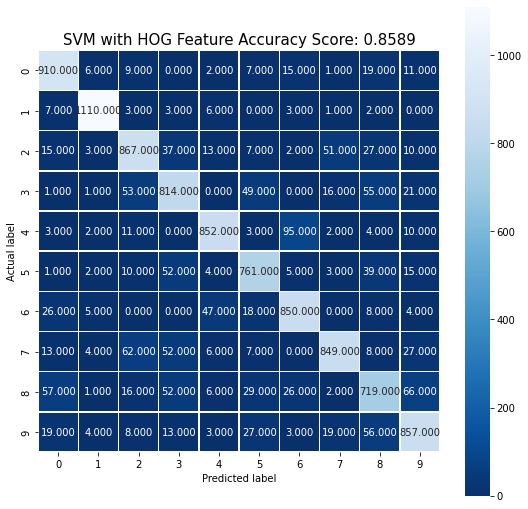

In [78]:
#config confussion matrix
cm  = metrics.confusion_matrix(y_test, HOG_predictions)
print(cm)

#visulise confussion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM with HOG Feature Accuracy Score: {0}'.format(HOG_testing_acc)
plt.title(all_sample_title, size = 15);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


two
zero
zero
eight


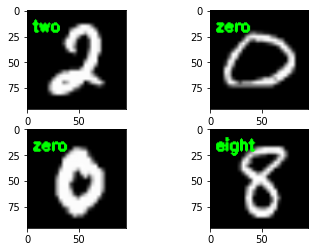

In [79]:
images = []
orig_labels=[]
# randomly select a few testing digit items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the digit
  test_img = (X_test_reshaped[i])
  H1 = feature.hog(test_img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  HOG_pred = SVM_Model_HOG.predict(H1.reshape(1, -1))[0]
  label = labelNames[HOG_pred]
  orig_labels.append(labelNames[y_test[i]])
  color = (0, 255, 0)
  test_img = cv2.merge([test_img] * 3)
  test_img = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(test_img, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(test_img)

## Display the classification results
#Plot the image and the predicted labels
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
print(orig_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
print(orig_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])
print(orig_labels[4])